In [2]:
import os
import yaml

# Paths
dataset_path = "/kaggle/input/traffic-road-object-detection-dataset-using-yolo"  # Dataset location
classes_file = os.path.join(dataset_path, "classes.txt")
output_yaml = "/kaggle/working/dataset.yaml"  # Save location for dataset.yaml

# Read class names from classes.txt
with open(classes_file, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

# Create YAML content
yaml_content = {
    "path": dataset_path,
    "train": "train/images",  # Relative path to training images
    "val": "val/images",      # Relative path to validation images
    "names": {i: name for i, name in enumerate(class_names)},  # Class ID to name mapping
}

# Write the YAML file
with open(output_yaml, "w") as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

print(f"dataset.yaml created successfully at: {output_yaml}")

dataset.yaml created successfully at: /kaggle/working/dataset.yaml


In [3]:
# Install Ultralytics if not already installed
!pip install ultralytics --quiet

from ultralytics import YOLO

# Define paths
data_yaml = "/kaggle/working/dataset.yaml"  # Path to the dataset YAML
model_path = "/kaggle/working/yolov8n.pt"  # You can use yolov8n.pt (nano), yolov8s.pt (small), etc.

# Load the YOLO model
model = YOLO(model_path)

# Train the model
model.train(
    data=data_yaml,  # Dataset YAML file
    epochs=50,       # Number of epochs (adjust as needed)
    imgsz=640,       # Image size for training
    batch=16,        # Batch size (adjust based on GPU memory)
    name="yolov8_training",  # Save directory for training runs
    device=0         # Use GPU (0) or CPU (-1)
)

# Optional: Validate the trained model
results = model.val()

# Optional: Save the trained model
best_model_path = "/kaggle/working/runs/detect/yolov8_training/weights/best.pt"
print(f"Training complete. Best model saved at: {best_model_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 15.4 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.7MB/s]


Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8n.pt, data=/kaggle/working/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-road-object-detection-dataset-using-yolo/train/labels... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:03<00:00, 111.45it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/traffic-road-object-detection-dataset-using-yolo/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 138.75it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_training
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.5G      1.728      2.014      1.084        276        640: 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        100        493     0.0154      0.937      0.387      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.37G      1.553     0.9581      1.046        231        640: 100%|██████████| 25/25 [00:05<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100        493          1      0.132      0.728      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.4G      1.496     0.8613      1.038        295        640: 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        100        493      0.968      0.556      0.825      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.4G      1.524     0.8415      1.042        224        640: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100        493      0.996      0.718      0.795      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.38G      1.474     0.8094      1.038        293        640: 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        100        493      0.959      0.752       0.87      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.46G      1.429     0.7731      1.018        325        640: 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100        493       0.98      0.775      0.888       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.4G      1.392     0.7343      1.013        325        640: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        100        493       0.99      0.784      0.836      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.39G      1.407     0.7221      1.014        262        640: 100%|██████████| 25/25 [00:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        100        493      0.969      0.836      0.915      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.37G      1.335     0.6858     0.9955        231        640: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        100        493      0.881      0.822      0.877      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.39G      1.339     0.6792     0.9958        306        640: 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        100        493      0.968      0.801        0.9      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.4G      1.308     0.6565     0.9881        290        640: 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        100        493      0.929      0.783      0.867      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.4G      1.304     0.6481     0.9863        335        640: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100        493      0.858      0.822      0.865      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G       1.29     0.6359     0.9875        233        640: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all        100        493      0.977      0.777      0.882      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.45G      1.318     0.6384     0.9845        249        640: 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100        493       0.97      0.803      0.907      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.39G      1.278     0.6188     0.9801        211        640: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        100        493      0.953      0.781      0.891      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.4G      1.247     0.6086     0.9739        233        640: 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100        493      0.933      0.763      0.881      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.4G      1.252     0.5999     0.9765        288        640: 100%|██████████| 25/25 [00:05<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        100        493       0.86      0.852      0.887      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.254     0.6001     0.9832        238        640: 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        100        493      0.966      0.765      0.895      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.41G      1.218     0.5788     0.9648        279        640: 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        100        493      0.809      0.897      0.907       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.4G      1.202     0.5769     0.9699        189        640: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        100        493      0.867      0.834      0.889      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G      1.218     0.5787     0.9617        306        640: 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        100        493      0.962      0.769      0.904      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.37G       1.21     0.5751     0.9606        292        640: 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        100        493       0.86       0.84      0.907      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.4G      1.226     0.5751     0.9656        261        640: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        100        493       0.86      0.844      0.894      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G      1.204     0.5569     0.9619        226        640: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        100        493      0.861      0.845      0.901      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.45G      1.194     0.5585     0.9673        274        640: 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        100        493      0.851      0.838      0.878      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G      1.159     0.5411       0.95        254        640: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        100        493      0.865      0.835      0.885      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.39G      1.158     0.5389     0.9616        244        640: 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        100        493      0.854      0.826      0.886      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.39G      1.153     0.5303     0.9503        212        640: 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all        100        493      0.858      0.819      0.904      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.45G      1.159     0.5407     0.9535        205        640: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100        493       0.87      0.843      0.888      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.4G      1.159     0.5323     0.9548        236        640: 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        100        493      0.826      0.884      0.898       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.39G      1.129     0.5202     0.9462        261        640: 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        100        493      0.953      0.777      0.897      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.46G      1.112     0.5179     0.9458        242        640: 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        100        493      0.863      0.838      0.886      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.4G      1.112     0.5147     0.9452        247        640: 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        100        493      0.861      0.819      0.901      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.46G      1.095     0.5089     0.9369        177        640: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100        493      0.846      0.846      0.897      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.4G        1.1     0.5108     0.9441        267        640: 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        100        493      0.859      0.824      0.885      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.4G      1.124     0.5188     0.9398        211        640: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        100        493      0.875      0.826      0.897      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.4G      1.098     0.5074     0.9425        254        640: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100        493      0.908      0.824      0.898      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.39G      1.106      0.511     0.9395        273        640: 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        100        493      0.957      0.759      0.883      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.4G       1.09     0.5047     0.9409        253        640: 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        100        493      0.946      0.769      0.877      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G      1.073     0.5007     0.9386        277        640: 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        100        493       0.96      0.772      0.881      0.559


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G      1.065     0.4965     0.9325        146        640: 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        100        493      0.878      0.819       0.89      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G      1.079     0.4967     0.9308        137        640: 100%|██████████| 25/25 [00:04<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        100        493      0.942      0.757       0.89      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G      1.056     0.4885     0.9285        129        640: 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        100        493      0.964      0.753      0.886      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      1.043     0.4811     0.9224        136        640: 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        100        493      0.938      0.765      0.881      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G      1.025     0.4741     0.9194        139        640: 100%|██████████| 25/25 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        100        493      0.888      0.817       0.89      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G      1.017     0.4675     0.9217        133        640: 100%|██████████| 25/25 [00:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        100        493      0.956      0.755      0.887      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G      1.009     0.4626     0.9196        139        640: 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        100        493      0.958      0.761      0.889      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G      1.002     0.4635     0.9182        139        640: 100%|██████████| 25/25 [00:04<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all        100        493      0.943      0.769      0.885      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.32G     0.9958     0.4645     0.9122        143        640: 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        100        493       0.94      0.768      0.887      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.32G     0.9872     0.4609     0.9114        141        640: 100%|██████████| 25/25 [00:04<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        100        493      0.936      0.771      0.884       0.56



50 epochs completed in 0.096 hours.
Optimizer stripped from runs/detect/yolov8_training/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_training/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_training/weights/best.pt...
Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


                   all        100        493      0.908      0.824      0.896      0.592
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_training
Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 783.04it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val is not writeable, cache not saved.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]


                   all        100        493      0.908      0.824      0.896      0.593
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/yolov8_training2
Training complete. Best model saved at: /kaggle/working/runs/detect/yolov8_training/weights/best.pt


In [7]:
from ultralytics import YOLO

# Load the trained model
model_path = "/kaggle/working/runs/detect/yolov8_training/weights/best.pt"  # Path to the best model weights
model = YOLO(model_path)

# Custom directory for saving predictions
save_directory = "/kaggle/working/runs/predict"

# Run inference on the validation images
results = model.predict(
    source="/kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images",  # Validation images
    save=True,              # Save predictions
    save_dir=save_directory,  # Custom save directory
    conf=0.5                # Confidence threshold
)

print(f"Inference complete. Predictions saved in: {save_directory}")


image 1/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0399.jpg: 384x640 6 cars, 8.1ms
image 2/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0400.jpg: 384x640 6 cars, 7.4ms
image 3/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0401.jpg: 384x640 6 cars, 6.8ms
image 4/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0402.jpg: 384x640 6 cars, 7.0ms
image 5/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0403.jpg: 384x640 6 cars, 7.3ms
image 6/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0404.jpg: 384x640 6 cars, 7.7ms
image 7/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0405.jpg: 384x640 6 cars, 7.3ms
image 8/100 /kaggle/input/traffic-road-object-detection-dataset-using-yolo/val/images/frame_0406.jpg: 384x640 6 cars, 6.9ms
image 9

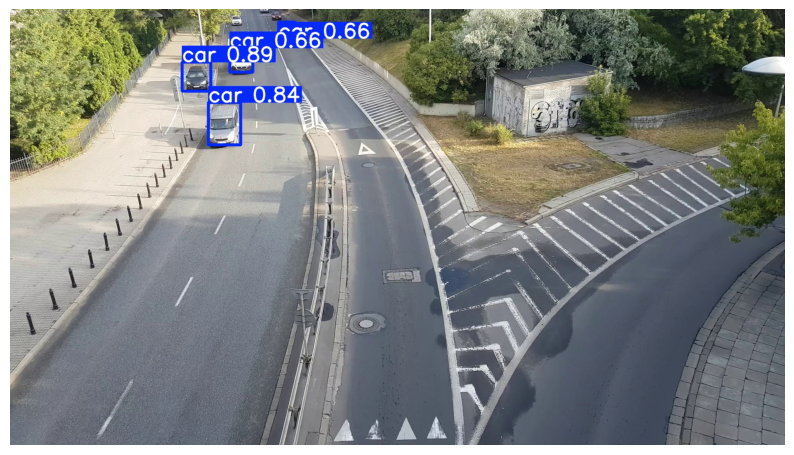

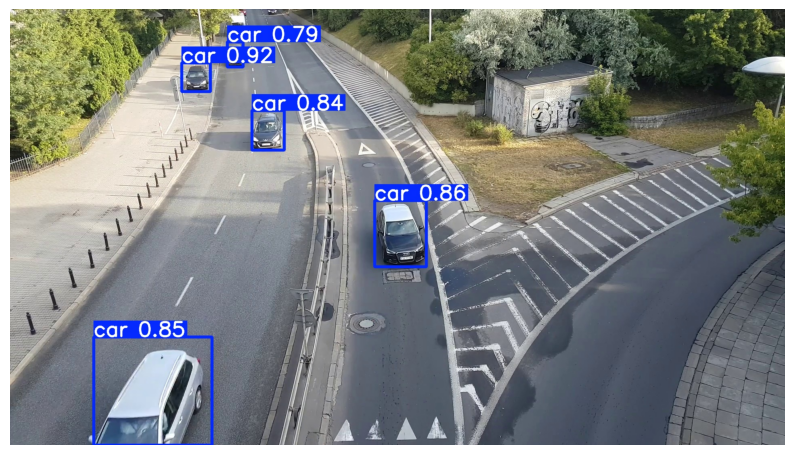

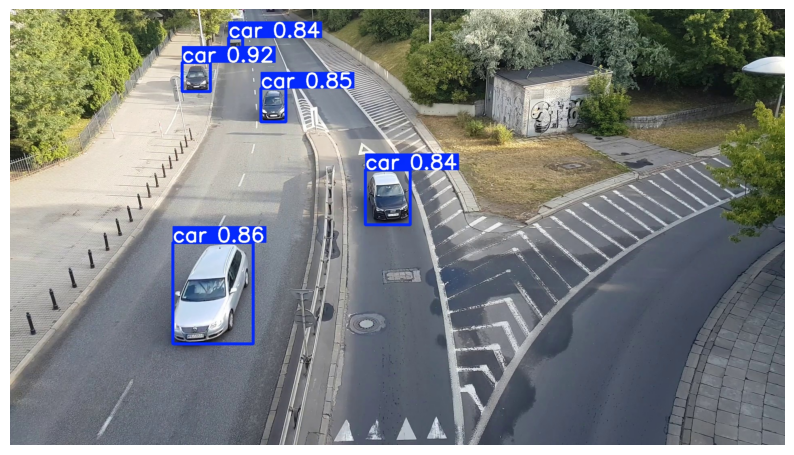

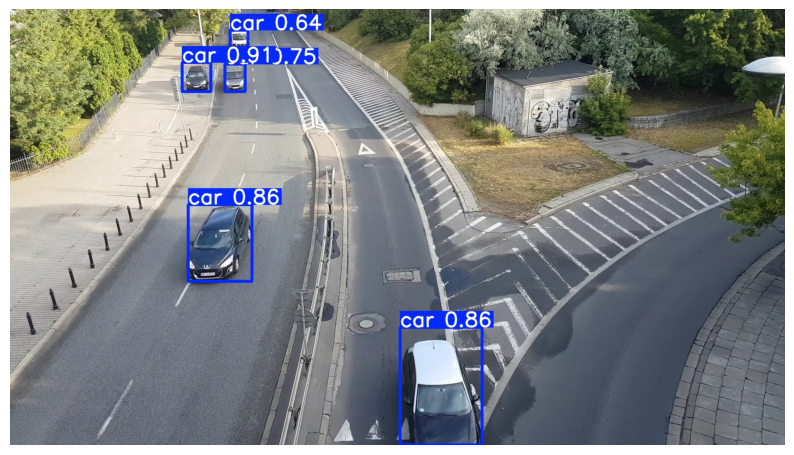

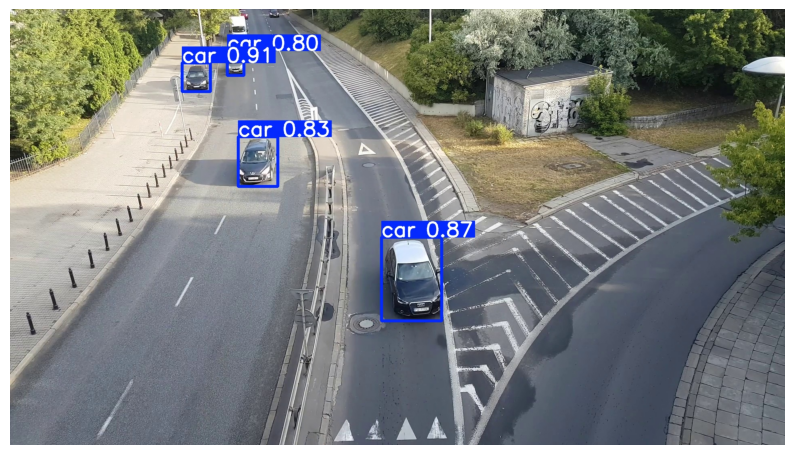

In [12]:
import cv2
import matplotlib.pyplot as plt
import os

# Directory where predictions are saved
predicted_dir = "/kaggle/working/runs/detect/predict2"

# Check if the directory exists
if not os.path.exists(predicted_dir):
    print(f"Directory {predicted_dir} does not exist. Make sure predictions were saved.")
else:
    # List and display predicted images
    predicted_images = [os.path.join(predicted_dir, img) for img in os.listdir(predicted_dir) if img.endswith(".jpg")]

    if len(predicted_images) == 0:
        print("No predicted images found in the directory.")
    else:
        for img_path in predicted_images[:5]:  # Display the first 5 images
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
            plt.figure(figsize=(10, 10))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

In [20]:
import cv2
import os
from IPython.display import Video, display

def images_to_video(image_folder, output_file, frame_rate=30):
    """
    Converts images from a folder into a video.

    Args:
        image_folder (str): Path to the folder containing images.
        output_file (str): Path for the output video file.
        frame_rate (int): Frame rate of the output video.
    """
    # List images in the folder, sorted by filename
    images = sorted([img for img in os.listdir(image_folder) if img.endswith((".jpg", ".png"))])
    
    if not images:
        print("No images found in the specified folder.")
        return False
    
    # Read the first image to get video dimensions
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, _ = frame.shape
    
    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
    video_writer = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))
    
    for image_name in images:
        image_path = os.path.join(image_folder, image_name)
        frame = cv2.imread(image_path)
        video_writer.write(frame)
    
    video_writer.release()
    print(f"Video saved at {output_file}")
    return True

# Parameters
predicted_dir = "/kaggle/working/runs/detect/predict2"  # Directory containing predicted images
output_video = "/kaggle/working/predicted_video.mp4"  # Name of the output video file
frame_rate = 30  # Frames per second

if os.path.exists(predicted_dir):
    success = images_to_video(predicted_dir, output_video, frame_rate)
else:
    print(f"Directory {predicted_dir} does not exist.")

Video saved at /kaggle/working/predicted_video.mp4
